<a href="https://colab.research.google.com/github/SoundaryaSarathi/MLCodes/blob/main/Mnist_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A neural network from scratch using mnist dataset.
There are m training examples each of 28 x 28 pixels which is 784 features as input.There is one input layer, one hidden layer(64 neurons) and one output layer(10 neurons).

In [1]:
from google.colab import files
from google.colab import drive
import matplotlib.pyplot as plt
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

Iteration:  0
[8 1 9 ... 8 8 2] [4 7 5 ... 7 7 6]
0.07641463414634146
Iteration:  10
[4 2 8 ... 8 0 0] [4 7 5 ... 7 7 6]
0.404219512195122
Iteration:  20
[4 2 8 ... 7 7 0] [4 7 5 ... 7 7 6]
0.5590975609756098
Iteration:  30
[4 7 2 ... 7 7 0] [4 7 5 ... 7 7 6]
0.64
Iteration:  40
[4 7 2 ... 7 7 6] [4 7 5 ... 7 7 6]
0.6860243902439025
Iteration:  50
[4 7 2 ... 7 7 6] [4 7 5 ... 7 7 6]
0.7190731707317073
Iteration:  60
[4 7 2 ... 7 7 6] [4 7 5 ... 7 7 6]
0.7421951219512195
Iteration:  70
[4 7 2 ... 7 7 6] [4 7 5 ... 7 7 6]
0.7599268292682927
Iteration:  80
[4 7 2 ... 7 7 6] [4 7 5 ... 7 7 6]
0.7740243902439025
Iteration:  90
[4 7 2 ... 7 7 6] [4 7 5 ... 7 7 6]
0.7850975609756098
shape: (784,)
Prediction:  3
Label:  3


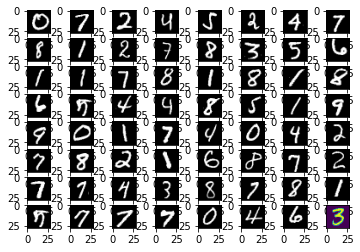

Prediction:  8
Label:  8


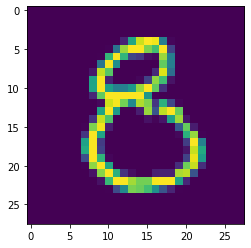

Prediction:  5
Label:  3


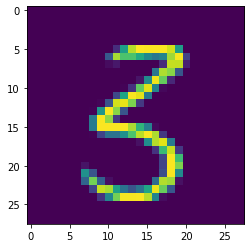

Prediction:  6
Label:  6


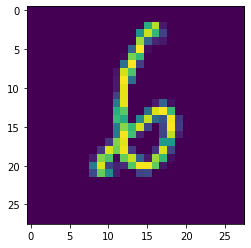

In [37]:
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/train.csv')
#print(data.head(5)) 
data=np.array(data)
np.random.shuffle(data)
xdata=data[:,1:785]
m,n=data.shape #m=samples,n=featuresd
#randomly printing 64 image

#visualizing random 64 examples
fig,axes=plt.subplots(8,8)
for i,ax in enumerate(axes.flat):
  random_index=np.random.randint(1000)
  x_reshaped=xdata[random_index].reshape((28,28))
  ax.imshow(x_reshaped,cmap='gray')

#generating training and test data
testdata=data[0:1000].T
ytest=testdata[0]
xtest=testdata[1:n]
traindata=data[1000:m].T
ytrain=traindata[0]
xtrain=traindata[1:n]
n,m=xtrain.shape

xtrain=xtrain/255.0
xtest=xtest/255.0
W1,b1,W2,b2=gradient_descent(xtrain,ytrain,0.10,100)


#testing the predictions on the training set
s=xtest[:,0]
print('shape:',s.shape)
test_prediction(xtest[:,0].reshape((784,1)),ytest[0],W1,b1,W2,b2)
test_prediction(xtest[:,1].reshape((784,1)),ytest[1],W1,b1,W2,b2)
test_prediction(xtest[:,2].reshape((784,1)),ytest[2],W1,b1,W2,b2)
test_prediction(xtest[:,3].reshape((784,1)),ytest[3],W1,b1,W2,b2)

In [36]:
def init_params():
    W1 = np.random.rand(64, 784) -0.5
    b1 = np.random.rand(64, 1) -0.5
    W2 = np.random.rand(10, 64) -0.5
    b2 = np.random.rand(10, 1) -0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A
    
def forward_prop(W1, b1, W2, b2, X):
    Z1 = np.dot(W1,X) + b1
    A1 = ReLU(Z1)
    #print('A1',A1.shape)
    Z2 = np.dot(W2,A1)+ b2
    A2 = softmax(Z2)
    #print('A2',A2.shape)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    Y=np.zeros((10,m))
    for i in range(m):
       k=ytrain[i]
       Y[k][i]=1
    return Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2



In [35]:

def test_prediction(x,y,W1, b1, W2, b2):
  Z1,A1,Z2,A2=forward_prop(W1,b1,W2,b2,x)
  print("Prediction: ", np.argmax(A2))
  print("Label: ", y)
  x= x.reshape((28, 28)) * 255.0
  plt.imshow(x)
  plt.show()